In [129]:
#SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from benfordslaw import benfordslaw

In [130]:
#import dataset
data = pd.read_excel("Data on TOP 100 EXPORT AND IMPORT  PRODUCTS (1).xlsx",sheet_name = ["EXPORT 2014","IMPORT 2014","EXPORT 2015","IMPORT 2015"])

In [131]:
#Extract sheets from dataset
exp14 = data.get("EXPORT 2014")
exp15 = data.get("EXPORT 2015")
imp14 = data.get("IMPORT 2014")
imp15 = data.get("IMPORT 2015")

In [132]:
#create new column with year 2014 and type of trade(IMPORT|EXPORT)
exp14 = exp14.rename(columns = exp14.iloc[0])
exp14 = exp14.iloc[1:,:]
exp14[["Year","IMP/EXP"]] = [2014,'Export']
exp14

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMP/EXP
1,2709000000,Petroleum oils and oils obtained from bitum...,12807117405.280001,5083270948.07,2014,Export
2,7108131000,Gold bullion,12416766877.186001,216345.79,2014,Export
3,1801001100,"Cocoa beans, superior quality raw beans",5787352851.55,784958252,2014,Export
4,7108120000,Unwrought gold (incl. gold plated with plat...,416894039.6,3738.78,2014,Export
5,1513290000,Palm kernel or babassu oil (excl. crude) an...,386065926.24,7285422.63,2014,Export
...,...,...,...,...,...,...
96,1106209900,"Other, not Cocoyam flour",11270002.82,67066.96,2014,Export
97,7001000000,Cullet and other waste and scrap of glass; ...,11163788.26,12086061.39,2014,Export
98,3602009000,Other prepared explosives,11078514.01,530466,2014,Export
99,3917231000,Of polymers of vinyl chloride for water supply,10929240.6,2150357.31,2014,Export


In [133]:
#create new column with year 2015 and type of trade(IMPORT|EXPORT)
exp15 = exp15.rename(columns = exp15.iloc[0])
exp15 = exp15.iloc[1:,:]
exp15[["Year","IMP/EXP"]] = [2015,"Export"]
exp15

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMP/EXP
1,7108131000,Gold bullion,14604981311.02,121394.65,2015,Export
2,1801001100,"Cocoa beans, superior quality raw beans",10146575221.299999,605771787.5,2015,Export
3,2709000000,Petroleum oils and oils obtained from bitum...,9822782163,5024354126.21,2015,Export
4,7108120000,Unwrought gold (incl. gold plated with plat...,1183622484.3,8576.16,2015,Export
5,2710192100,Gas oil,1078886335.81,523796821.59,2015,Export
...,...,...,...,...,...,...
96,3823190000,Industrial monocarboxylic fatty acids & aci...,10467562.36,4023470,2015,Export
97,9015900000,Parts and accessories of surveying... instr...,10399820.59,22288.33,2015,Export
98,5208521000,"Cotton, plain weave, printed wax-bsd, cont ...",10333194.16,215558.29,2015,Export
99,3923900000,"Articles for the packing of goods, of plast...",10271273.75,1236044.27,2015,Export


In [134]:
#create new column with year 2014 and type of trade(IMPORT|EXPORT)
imp14 = imp14.rename(columns = imp14.iloc[0])
imp14 = imp14.iloc[1:,:]
imp14[["Year","IMP/EXP"]] = [2014,'Import']
imp14

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMP/EXP
1,2523100000,Cement clinkers,1646138258.86,3866159818.31,2014,Import
2,8705900010,"Other special purpose motor vehicle, nes, new",1199512148.12,737438.61,2014,Import
3,2709000000,Petroleum oils and oils obtained from bitum...,1149418088.288,3857276.603,2014,Import
4,8502399000,Other generating sets : Other: Other,907226467.65,13009081.13,2014,Import
5,8708990000,"Parts and accessories, nes, for vehicles of...",721513001.883,3282918.06,2014,Import
...,...,...,...,...,...,...
96,3904100000,"Polyvinyl chloride, not mixed with other su...",71003613.11,22152806.27,2014,Import
97,8409990000,Parts for compression-ignition internal com...,70386491.63,1147439.95,2014,Import
98,8703332050,"Other vehicles, with compression-ignition i...",70364764.27,2528818.35,2014,Import
99,7214200000,"Iron/Steel b&r, h/r, irregular coils with d...",70099151.94,39949979.61,2014,Import


In [135]:
#create new column with year 2015 and type of trade(IMPORT|EXPORT)
imp15 = imp15.rename(columns = imp15.iloc[0])
imp15 = imp15.iloc[1:,:]
imp15[["Year","IMP/EXP"]] = [2015,"Import"]
imp15

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMP/EXP
1,2709000000,Petroleum oils and oils obtained from bitum...,3684485899.842,72988442.172,2015,Import
2,8703232050,"Other vehicles, with spark-ignition interna...",1408554253.39,21523025.47,2015,Import
3,2523100000,Cement clinkers,1352314212.77,2877426912.63,2015,Import
4,4011100000,"New pneumatic tyres, of rubber of a kind us...",965353487.06,5341841.39,2015,Import
5,1006400000,"Rice, broken",876604626.89,537485689.77,2015,Import
...,...,...,...,...,...,...
96,6304911000,Mosquito net whether or not treated,84411904.84,6063705.92,2015,Import
97,8544499000,"Other electric conductors, for a voltage no...",83767126.32,9270795.14,2015,Import
98,9030400000,Measuring/checking instruments/apparatus fo...,83395401.32,285287.34,2015,Import
99,3902100000,"Polypropylene, in primary forms",82697432.06,16583945.01,2015,Import


In [136]:
#merge all the datasets
df = pd.concat([exp14,exp15,imp14,imp15], axis = 0)

In [137]:
#finding missing values
df.isnull().sum()

HS CODE               0
ITEM DESCRIPTION      0
CUSTOM VALUE (GHS)    0
NETWEIGHT (KGs)       0
Year                  0
IMP/EXP               0
dtype: int64

In [138]:
#view merged data and save to pickle
df
df.to_pickle("merge1.pkl")

In [139]:
#make a copy of the dataset
new = df.copy()

In [140]:
#cleaning data: removing whitespaces
new['HS CODE'] = new['HS CODE'].str.strip()

In [141]:
#cleaning data: extracting first 4 characters of the HS CODE
new['HS HEADER'] = new['HS CODE'].str[:4]

In [142]:
#cleaning data: numbers preceding with 0 do not support numerical operations so we replace all numbers starting with 0 with -1 in a new column
new['HS HEADER'] = new['HS HEADER'].str.replace(r'^0',"-1",regex = True)

In [143]:
#cleaning data: converting the new column to type int in order to set a range condition
new = new.astype({'HS HEADER':'int'})

In [144]:
#creating conditions where if an HS HEADER code falls between the range sepcified, a new column should be created with the relative category
#or meaning of the HS CODE
cond = [
        (new['HS HEADER'] >= -1804 )& (new['HS HEADER'] <= -1599),
        (new['HS HEADER'] >= -1601) & (new['HS HEADER'] <= 1499),
        (new['HS HEADER'] >= 1501)  & (new['HS HEADER'] <= 1599),
        (new['HS HEADER'] >= 1600)  & (new['HS HEADER'] <= 2499),
        (new['HS HEADER'] >= 2500)  & (new['HS HEADER'] <= 2799),
        (new['HS HEADER'] >= 2800)  & (new['HS HEADER'] <= 3899),
        (new['HS HEADER'] >= 3900)  & (new['HS HEADER'] <= 4099),
        (new['HS HEADER'] >= 4100)  & (new['HS HEADER'] <= 4399),
        (new['HS HEADER'] >= 4400)  & (new['HS HEADER'] <= 4699),
        (new['HS HEADER'] >= 4700)  & (new['HS HEADER'] <= 4999),
        (new['HS HEADER'] >= 5000)  & (new['HS HEADER'] <= 6399),
        (new['HS HEADER'] >= 6400)  & (new['HS HEADER'] <= 6799),
        (new['HS HEADER'] >= 6800)  & (new['HS HEADER'] <= 7099),
        (new['HS HEADER'] >= 7100)  & (new['HS HEADER'] <= 7199),
        (new['HS HEADER'] >= 7200)  & (new['HS HEADER'] <= 8399),
        (new['HS HEADER'] >= 8400)  & (new['HS HEADER'] <= 8599),
        (new['HS HEADER'] >= 8600)  & (new['HS HEADER'] <= 8999),
        (new['HS HEADER'] >= 9000)  & (new['HS HEADER'] <= 9299),
        (new['HS HEADER'] >= 9300)  & (new['HS HEADER'] <= 9399),
        (new['HS HEADER'] >= 9400)  & (new['HS HEADER'] <= 9699),
        (new['HS HEADER'] >= 9600)
       ]

choices = ['Animal & Animal Products','Vegetable Products','Animal or Vegetable Fats and Oils','Prepared Foodstuffs','Mineral Products','Chemicals & Allied Industries',
          'Plastics / Rubbers','Raw Hides, Skins, Leather, & Furs','Wood & Wood Products','Pulp of Wood or of Other Fibrous Material','Textiles',
           'Footwear / Headgear','Stone / Glass','Natural or Cultured Pearls','Base Metals','Machinery / Electrical','Transportation','Precision Instruments',
           'Arms and Ammunition','Miscellaneous Manufactured Articles','Works of Art']
          

new['Category'] = np.select(cond,choices,default="Not Found")

In [145]:
#view 'new' dataset and save to pickle
new.to_pickle("newHSHeader.pkl")
new#['HS HEADER'].min()

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMP/EXP,HS HEADER,Category
1,2709000000,Petroleum oils and oils obtained from bitum...,12807117405.280001,5083270948.07,2014,Export,2709,Mineral Products
2,7108131000,Gold bullion,12416766877.186001,216345.79,2014,Export,7108,Natural or Cultured Pearls
3,1801001100,"Cocoa beans, superior quality raw beans",5787352851.55,784958252,2014,Export,1801,Prepared Foodstuffs
4,7108120000,Unwrought gold (incl. gold plated with plat...,416894039.6,3738.78,2014,Export,7108,Natural or Cultured Pearls
5,1513290000,Palm kernel or babassu oil (excl. crude) an...,386065926.24,7285422.63,2014,Export,1513,Animal or Vegetable Fats and Oils
...,...,...,...,...,...,...,...,...
96,6304911000,Mosquito net whether or not treated,84411904.84,6063705.92,2015,Import,6304,Textiles
97,8544499000,"Other electric conductors, for a voltage no...",83767126.32,9270795.14,2015,Import,8544,Machinery / Electrical
98,9030400000,Measuring/checking instruments/apparatus fo...,83395401.32,285287.34,2015,Import,9030,Precision Instruments
99,3902100000,"Polypropylene, in primary forms",82697432.06,16583945.01,2015,Import,3902,Plastics / Rubbers


In [146]:
#make a copy of the 'new' dataset
moti = new.copy()

In [147]:
#drop column of HS HEADER
moti = moti.drop(columns = ['HS HEADER'])

In [148]:
#view dataset and save to pickle
moti.to_pickle("cleandata.pkl")
moti

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMP/EXP,Category
1,2709000000,Petroleum oils and oils obtained from bitum...,12807117405.280001,5083270948.07,2014,Export,Mineral Products
2,7108131000,Gold bullion,12416766877.186001,216345.79,2014,Export,Natural or Cultured Pearls
3,1801001100,"Cocoa beans, superior quality raw beans",5787352851.55,784958252,2014,Export,Prepared Foodstuffs
4,7108120000,Unwrought gold (incl. gold plated with plat...,416894039.6,3738.78,2014,Export,Natural or Cultured Pearls
5,1513290000,Palm kernel or babassu oil (excl. crude) an...,386065926.24,7285422.63,2014,Export,Animal or Vegetable Fats and Oils
...,...,...,...,...,...,...,...
96,6304911000,Mosquito net whether or not treated,84411904.84,6063705.92,2015,Import,Textiles
97,8544499000,"Other electric conductors, for a voltage no...",83767126.32,9270795.14,2015,Import,Machinery / Electrical
98,9030400000,Measuring/checking instruments/apparatus fo...,83395401.32,285287.34,2015,Import,Precision Instruments
99,3902100000,"Polypropylene, in primary forms",82697432.06,16583945.01,2015,Import,Plastics / Rubbers


In [149]:
#Finding the number of rows and number of columns
print(f" The data set has {moti.shape[0]} rows and {moti.shape[1]} columns")

 The data set has 400 rows and 7 columns


In [150]:
#info of the dataset
moti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 100
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   HS CODE             400 non-null    object
 1   ITEM DESCRIPTION    400 non-null    object
 2   CUSTOM VALUE (GHS)  400 non-null    object
 3   NETWEIGHT (KGs)     400 non-null    object
 4   Year                400 non-null    int64 
 5   IMP/EXP             400 non-null    object
 6   Category            400 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.0+ KB


In [151]:
#converting type of CUSTOM VALUE(GHS) AND NETWEIGHT(KGS) TO TYPE INT
moti = moti.astype({"CUSTOM VALUE (GHS)":"int64","NETWEIGHT (KGs)":"int64"})
moti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 100
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   HS CODE             400 non-null    object
 1   ITEM DESCRIPTION    400 non-null    object
 2   CUSTOM VALUE (GHS)  400 non-null    int64 
 3   NETWEIGHT (KGs)     400 non-null    int64 
 4   Year                400 non-null    int64 
 5   IMP/EXP             400 non-null    object
 6   Category            400 non-null    object
dtypes: int64(3), object(4)
memory usage: 25.0+ KB


In [152]:
moti.Category.nunique()

19

#### OVERALL STATISTICS OF THE DATAFRAME

In [153]:
moti.describe()

,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year
count,4.000000e+02,4.000000e+02,400.000000
mean,3.288968e+08,1.217524e+08,2014.500000
std,1.383052e+09,6.745937e+08,0.500626
min,1.003840e+07,5.900000e+01,2014.000000
25%,3.661806e+07,1.670735e+06,2014.000000
50%,9.570434e+07,6.144154e+06,2014.500000
75%,1.721492e+08,2.835228e+07,2015.000000
max,1.460498e+10,8.937970e+09,2015.000000


#### SUM OF CUSTOM VALUE OF IMPORT AND EXPORT BETWEEN 2014 AND 2015

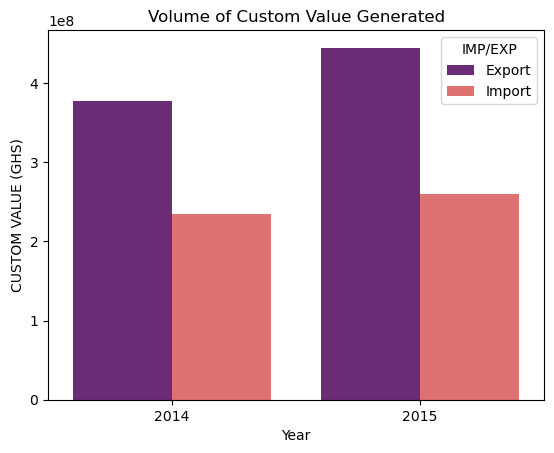

In [154]:
sns.barplot(x = 'Year', y = 'CUSTOM VALUE (GHS)', hue = 'IMP/EXP', data = moti, palette = 'magma', errorbar = None)
plt.title("Volume of Custom Value Generated")
plt.show()

In [155]:
pd.pivot_table(moti, values ='CUSTOM VALUE (GHS)', index = ["Year",'IMP/EXP'],aggfunc = sum)

CUSTOM VALUE (GHS)
Year IMP/EXP                    
2014 Export          37715661663
     Import          23393903459
2015 Export          44450098561
     Import          25999054701

In [156]:
37715661663

37715661663

##### There was a 16.39% increase in Custom Value for goods exported; and a 10.55% increase in Custom Value for goods imported between 2014 and 2015


#### CUSTOM VALUE GENERATED FROM EXPORT BY CATEGORY FOR 2014 AND 2015

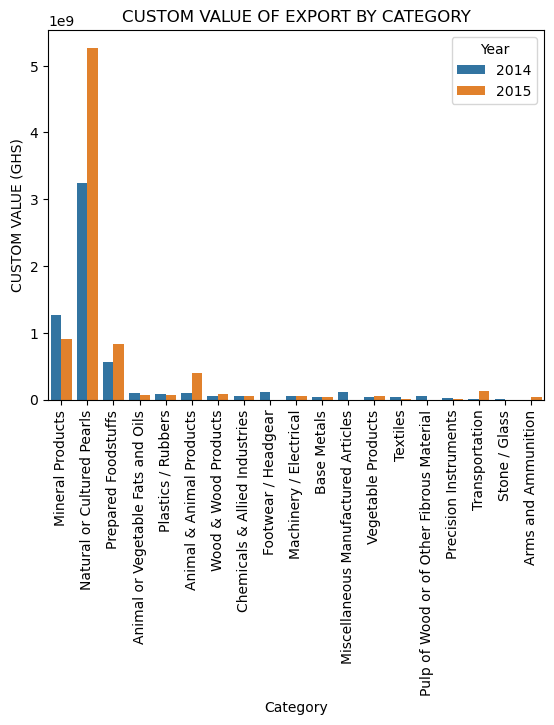

In [157]:
exp1 = moti[moti['IMP/EXP'] == 'Export']
sns.barplot(data = exp1, x = 'Category', y = 'CUSTOM VALUE (GHS)', hue = 'Year' ,  errorbar = None)
plt.title("CUSTOM VALUE OF EXPORT BY CATEGORY")
plt.xticks(rotation=90)
plt.legend(title = 'Year', loc = 'upper right')
plt.show()

#### CUSTOM VALUE GENERATED FROM IMPORT BY CATEGORY FOR 2014 AND 2015

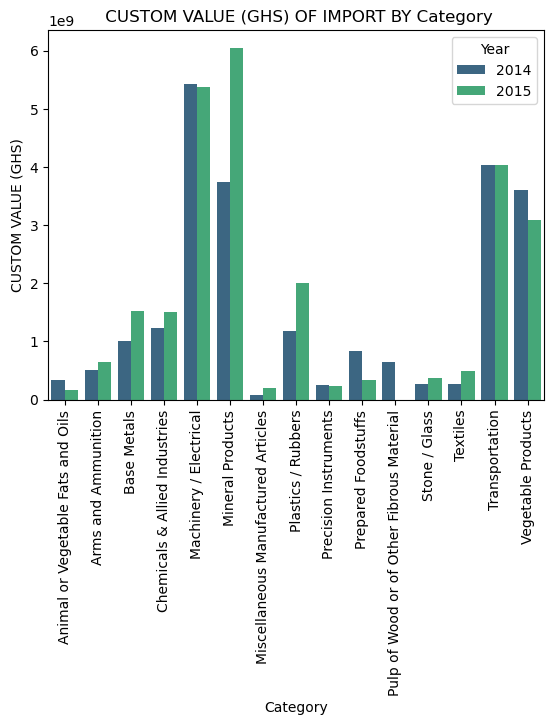

In [158]:
imp1 = moti[moti['IMP/EXP'] == 'Import']
agg_data = imp1.groupby(['Category', 'Year'])['CUSTOM VALUE (GHS)'].sum().reset_index()
sns.barplot(data=agg_data, x='Category', y='CUSTOM VALUE (GHS)', hue='Year', palette='viridis')
plt.title(" CUSTOM VALUE (GHS) OF IMPORT BY Category")
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.show()


#### SUM OF NETWEIGHT OF EXPORT BY CATEGORY FOR 2014 AND 2015

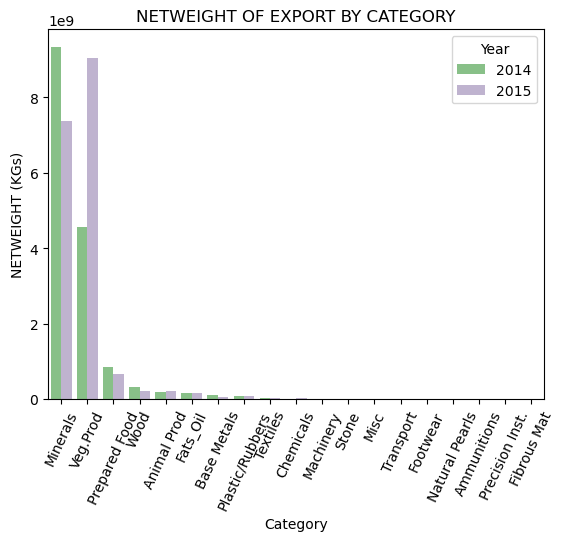

In [159]:
expnet = exp1.groupby(['Category','Year'])['NETWEIGHT (KGs)'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = expnet , x = 'Category', y = 'NETWEIGHT (KGs)', hue = 'Year',  palette = 'Accent')
label=['Minerals','Veg.Prod','Prepared Food','Wood','Animal Prod','Fats_Oil','Base Metals','Plastic/Rubbers','Textiles','Chemicals','Machinery','Stone','Misc','Transport','Footwear','Natural Pearls','Ammunitions','Precision Inst.','Fibrous Mat']
plt.xticks(ticks = plt.xticks()[0],labels = label, rotation=65)
plt.title('NETWEIGHT OF EXPORT BY CATEGORY')
plt.legend(title = 'Year',loc = 'upper right')
plt.show()

#### SUM OF NETWEIGHT OF IMPORT BY CATEGORY FOR 2014 AND 2015

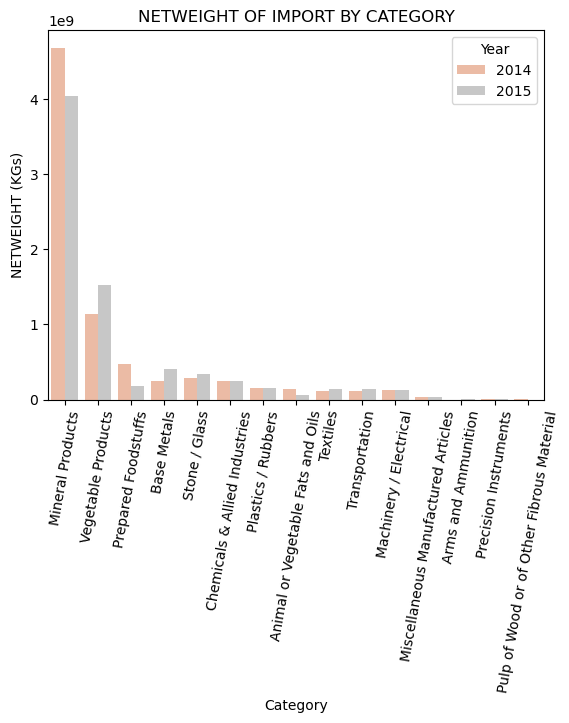

In [160]:
impnet = imp1.groupby(['Category','Year'])['NETWEIGHT (KGs)'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = impnet , x = 'Category', y = 'NETWEIGHT (KGs)', hue = 'Year',  palette = 'RdGy')
plt.xticks(rotation=80)
plt.title('NETWEIGHT OF IMPORT BY CATEGORY')
plt.legend(title = 'Year',loc='upper right')
plt.show()

#### RELATIONSHIP BETWEEN CUSTOM VALUE AND NETWEIGHT

<Axes: xlabel='CUSTOM VALUE (GHS)', ylabel='NETWEIGHT (KGs)'>

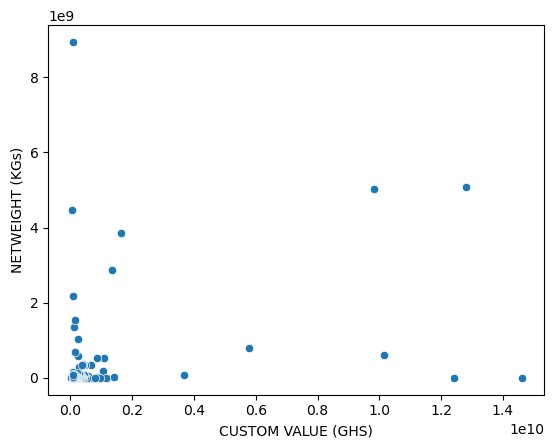

In [161]:
sns.scatterplot(x = 'CUSTOM VALUE (GHS)', y = 'NETWEIGHT (KGs)', data = moti)

#### FREQUENT WORDS BY ITEM DESCRIPTION

In [162]:
ll = []
for i in exp1['ITEM DESCRIPTION']:
    i.split()
    ll.append(i)

#ll.split() 
nii =" ".join(ll)

In [163]:
#expcl = " ".join(cat.split()[0] for cat in exp1['ITEM DESCRIPTION'])
stopwords_list = ['other','of','and','or','nes','for','in','not','the','non','with','fractions','a']

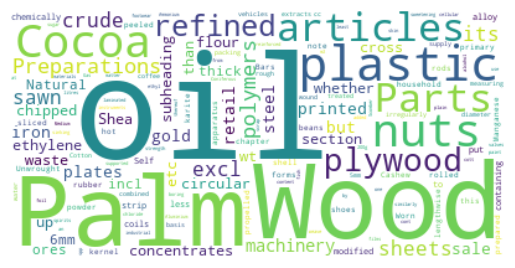

In [164]:
word_expcl = WordCloud(stopwords = stopwords_list,collocations = False, background_color = 'white').generate(nii)
plt.imshow(word_expcl, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [165]:
#nii

#### FINDING OUTLIERS IN DATASET

In [166]:
#finding outliers in the dataset for export

In [167]:
IQR_exp = exp1['CUSTOM VALUE (GHS)'].quantile(0.75) - exp1['CUSTOM VALUE (GHS)'].quantile(0.25)
IQR_exp

80592057.75

In [168]:
low_exp = exp1['CUSTOM VALUE (GHS)'].quantile(0.25) - 1.5 * IQR_exp
low_exp

-102087933.125

In [169]:
high_exp = exp1['CUSTOM VALUE (GHS)'].quantile(0.75) + 1.5 * IQR_exp
high_exp

220280297.875

In [170]:
exp1['CUSTOM VALUE (GHS)'].max() > high_exp

True

###### The max Customs Value is greater than the high IQR, therefore there are outliers in the Custom Value generated from Exports

<Axes: xlabel='CUSTOM VALUE (GHS)'>

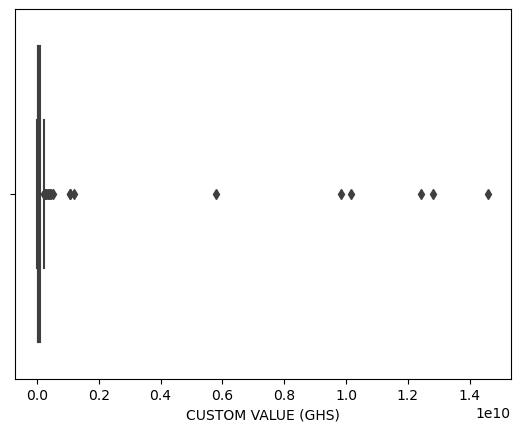

In [171]:
sns.boxplot(data = exp1, x = exp1['CUSTOM VALUE (GHS)'])

In [172]:
#finding outliers in dataset for import

In [173]:
IQR_imp = imp1['CUSTOM VALUE (GHS)'].quantile(0.75) - imp1['CUSTOM VALUE (GHS)'].quantile(0.25)
IQR_imp

168199073.75

In [174]:
low_imp = imp1['CUSTOM VALUE (GHS)'].quantile(0.25) - 1.5 * IQR_imp
low_imp

-158071120.625

In [175]:
high_imp = imp1['CUSTOM VALUE (GHS)'].quantile(0.75) + 1.5 * IQR_imp
high_imp

514725174.375

In [176]:
imp1['CUSTOM VALUE (GHS)'].max() > high_imp

True

##### The maximum value in Custom Value is greater than the high IQR. Showing there are outliers in the Custom Value generated from import

<Axes: ylabel='CUSTOM VALUE (GHS)'>

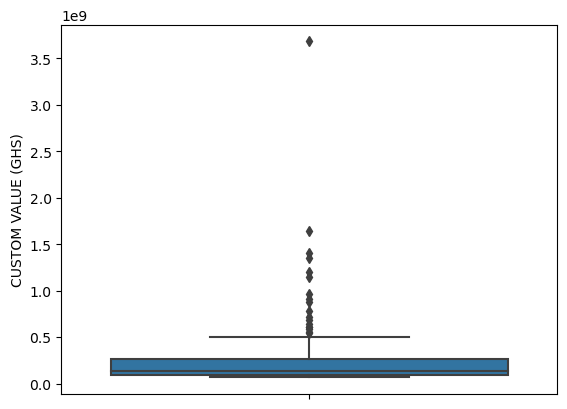

In [177]:
sns.boxplot(data = imp1, y = imp1['CUSTOM VALUE (GHS)'])

#### PLOT CUSTOM VALUE(GHS) TO UNDERSTAND DISTRIBUTION

<Axes: xlabel='CUSTOM VALUE (GHS)', ylabel='Count'>

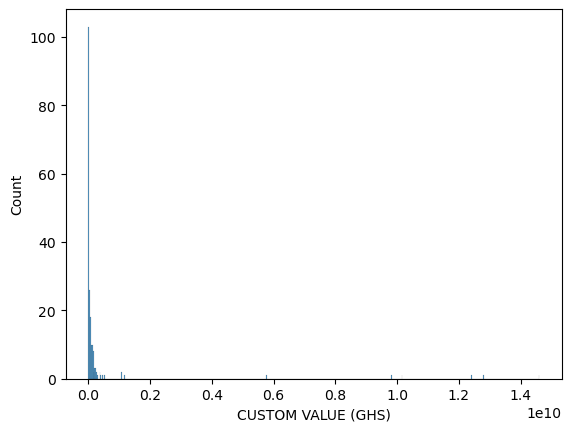

In [178]:
sns.histplot(data = exp1, x = 'CUSTOM VALUE (GHS)')

#### FINDING WHICH MINERAL PRODUCTS WERE IMPORTED

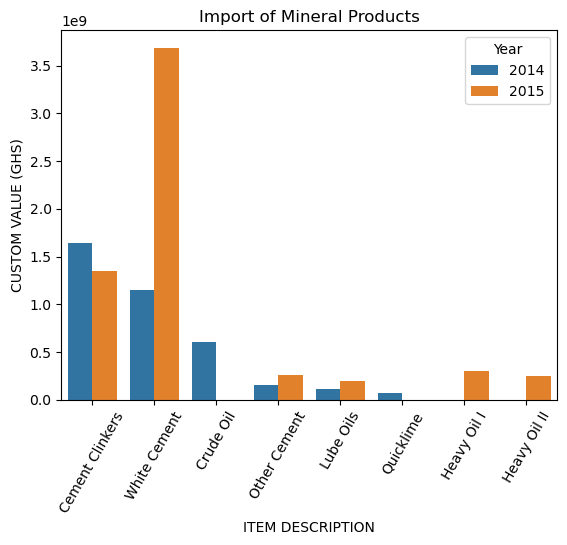

In [179]:
minim = imp1[imp1.Category == "Mineral Products"]
sns.barplot(data = minim, x = 'ITEM DESCRIPTION', y = 'CUSTOM VALUE (GHS)', hue = 'Year')
label = ['Cement Clinkers','White Cement','Crude Oil','Other Cement','Lube Oils','Quicklime','Heavy Oil I', 'Heavy Oil II']
plt.xticks(ticks = plt.xticks()[0], labels = label, rotation = 60)
plt.title('Import of Mineral Products')
plt.legend(title = 'Year', loc = 'upper right')
plt.show()

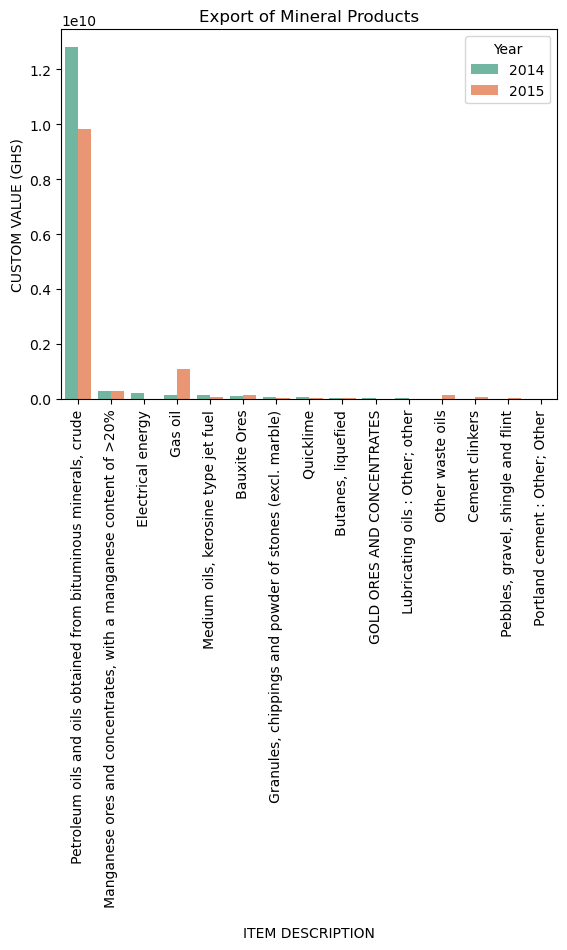

In [180]:
minex = exp1[exp1.Category == "Mineral Products"]
sns.barplot(data = minex, x = 'ITEM DESCRIPTION', y = 'CUSTOM VALUE (GHS)', hue = 'Year',palette = 'Set2')
label = ['Bituminous Min','Manganese','Elect.Energy','Bauxite','Medium Oils', 'Quicklime','Butanes','Gold Ores','Lube Oils','Cement Clinkers','Pebbles','Other Cement']
plt.title('Export of Mineral Products')
plt.legend(title="Year", loc = 'upper right')
plt.xticks(rotation = 90)
plt.show()

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=3.6154e-09, Tstat=55.4462


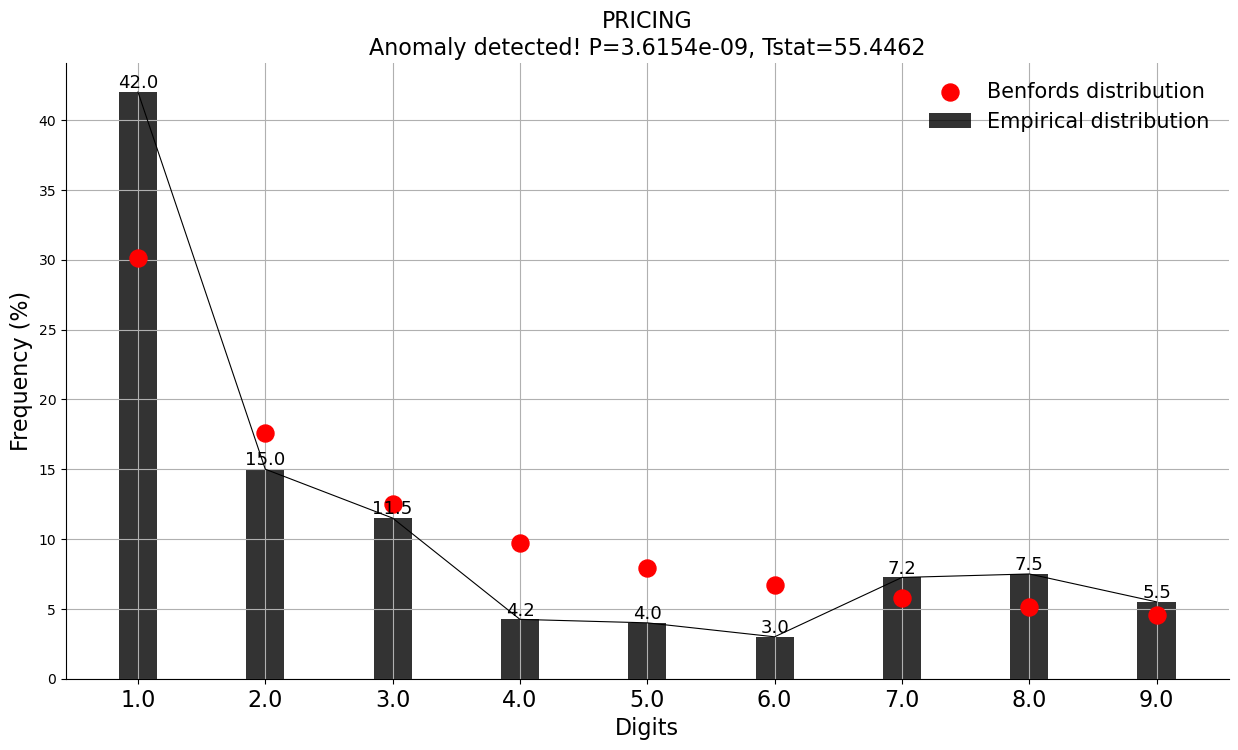

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'PRICING\nAnomaly detected! P=3.6154e-09, Tstat=55.4462'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [181]:
bl = benfordslaw(alpha = 0.05)
x1 = moti['CUSTOM VALUE (GHS)']
results = bl.fit(x1)
bl.plot(title = "PRICING")